# 4.2, 4.3

In [3]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- R_1 + x[2,] %*% t(x[2,])
h_2 <- h_1 + x[2,] * y[2]

# we estimate theta (for the first time - so not yet using "update" formula):

h_3 <- h_2 + x[3,] * y[3]
R <- R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
}
parameter_list[N,]


[1] -110.35544768    0.05614457

# 4.4

In [4]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- 0.9*R_1 + x[2,] %*% t(x[2,])
h_2 <- 0.9*h_1 + x[2,] * y[2]



h_3 <- 0.9*h_2 + x[3,] * y[3]
R <- 0.9*R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R * 0.9 + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
}
parameter_list[N,]

[1] -52.4828615   0.0275299

In [5]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)
R_initial <- diag(0.0000001,nrow = 2,ncol = 2)
h_1 <- x[1,]*y[1]
R <- 0.9*R_initial + x[1,] %*% t(x[1,])
parameter_list[1,] <- solve(R) %*% h_1

for (i in 2:N) {
R <- R * 0.9 + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,]) }
parameter_list[N,] 

[1] -52.48106382   0.02752901

# CREATE FUNCTION TO FIND THE BEST LAMBDA

In [52]:
Recursiveestimation <- function(lambda) {D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)
prediction_list <- matrix(NA, nrow=N, ncol=1)
error_list <- matrix(NA, nrow=N, ncol=1)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- lambda*R_1 + x[2,] %*% t(x[2,])
h_2 <- lambda*h_1 + x[2,] * y[2]



h_3 <- lambda*h_2 + x[3,] * y[3]
R <- lambda*R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R * lambda + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
if (i<N){prediction_list[i+1] <- x[i+1,]%*%parameter_list[i,]}
if (i<N){error_list[i+1]<-prediction_list[i+1]-Dtrain$total[i+1]}
}
return(list(par=parameter_list[,1],pre=prediction_list,err=error_list))
}



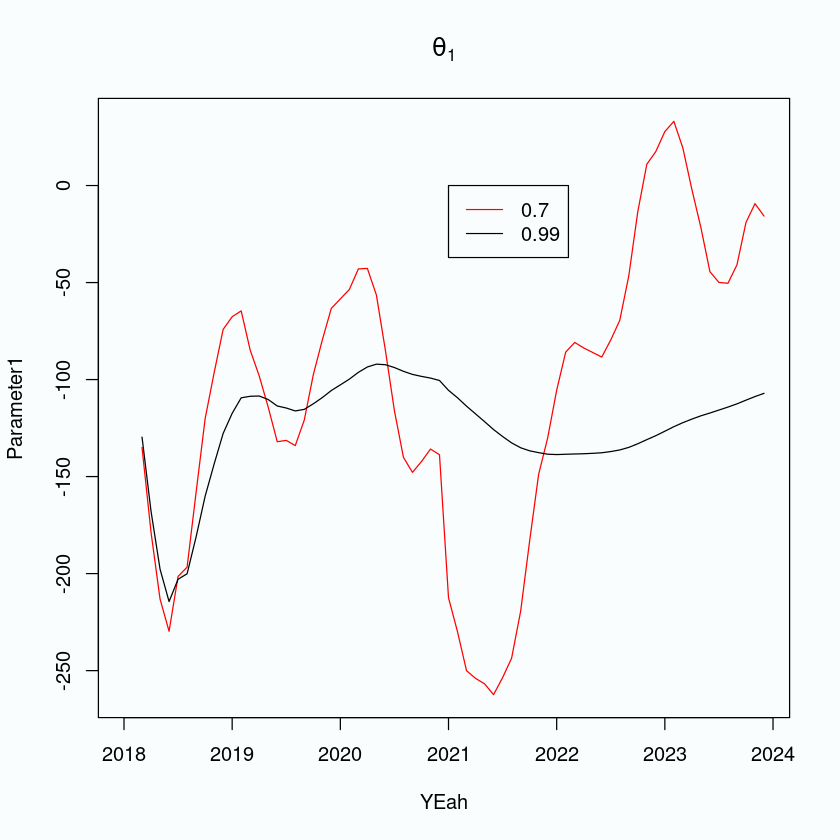

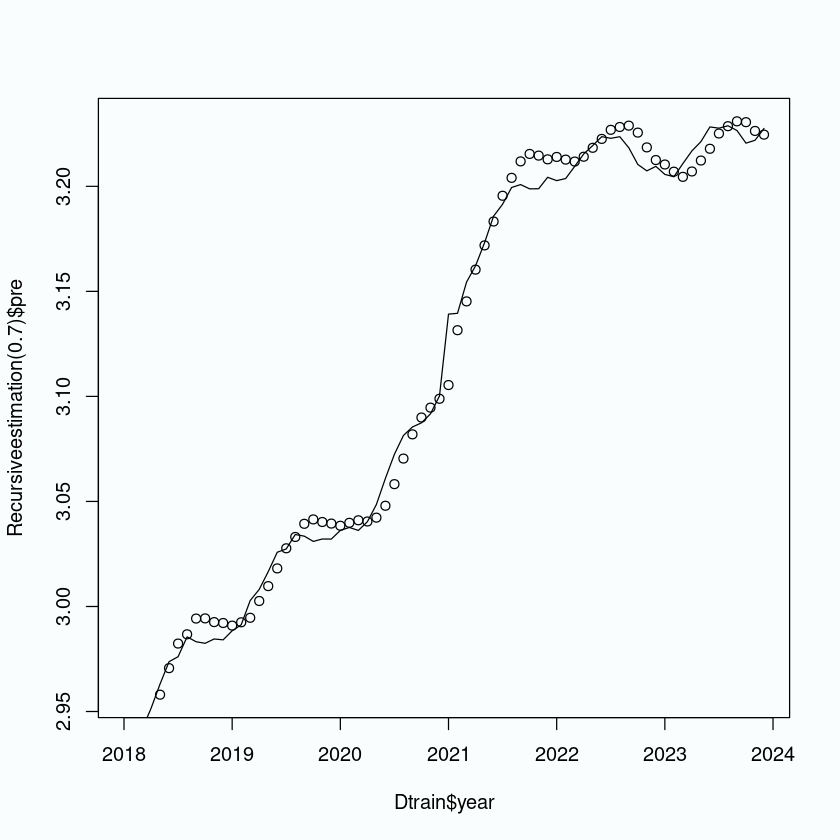

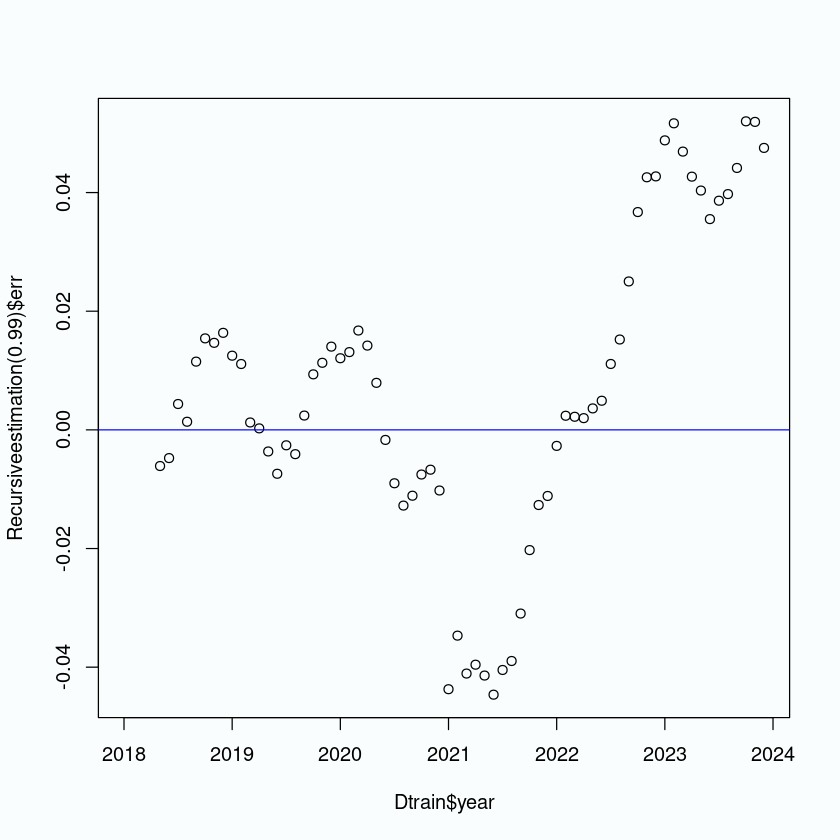

In [53]:
par(bg = "#fafdfd")

plot(Dtrain$year,Recursiveestimation(0.7)$par,"l",col = "red",xlab = "YEah",ylab = "Parameter1",main = expression(theta[1]))
points(Dtrain$year,Recursiveestimation(0.99)$par,"l",col = "black")
legend(2021,0,c("0.7","0.99"), lty=rep(1,2), col=c("red","black"))
plot(Dtrain$year,Recursiveestimation(0.7)$pre,col = "#000000")
points(Dtrain$year,Dtrain$total,"l")
plot(Dtrain$year,Recursiveestimation(0.99)$err,col = "#000000")
abline(h = 0, col = "blue", lty = 1)

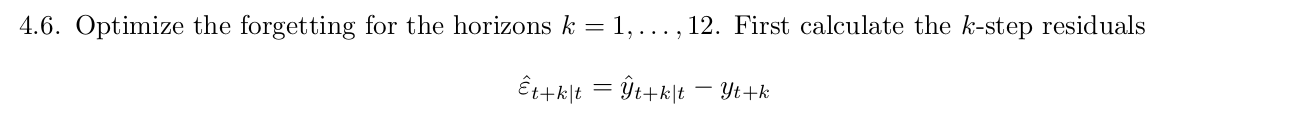

In [ ]:
Recursiveestimation <- function(lambda,k) {D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)
prediction_list <- matrix(NA, nrow=N, ncol=1)
error_list <- matrix(NA, nrow=N, ncol=1)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- lambda*R_1 + x[2,] %*% t(x[2,])
h_2 <- lambda*h_1 + x[2,] * y[2]



h_3 <- lambda*h_2 + x[3,] * y[3]
R <- lambda*R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R * lambda + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
if (i+k<N){prediction_list[i+k] <- x[i+k,]%*%parameter_list[i,]}
if (i+k<N){error_list[i+k]<-prediction_list[i+k]-Dtrain$total[i+k]}
}
return(list(par=parameter_list[,1],pre=prediction_list,err=error_list))
}


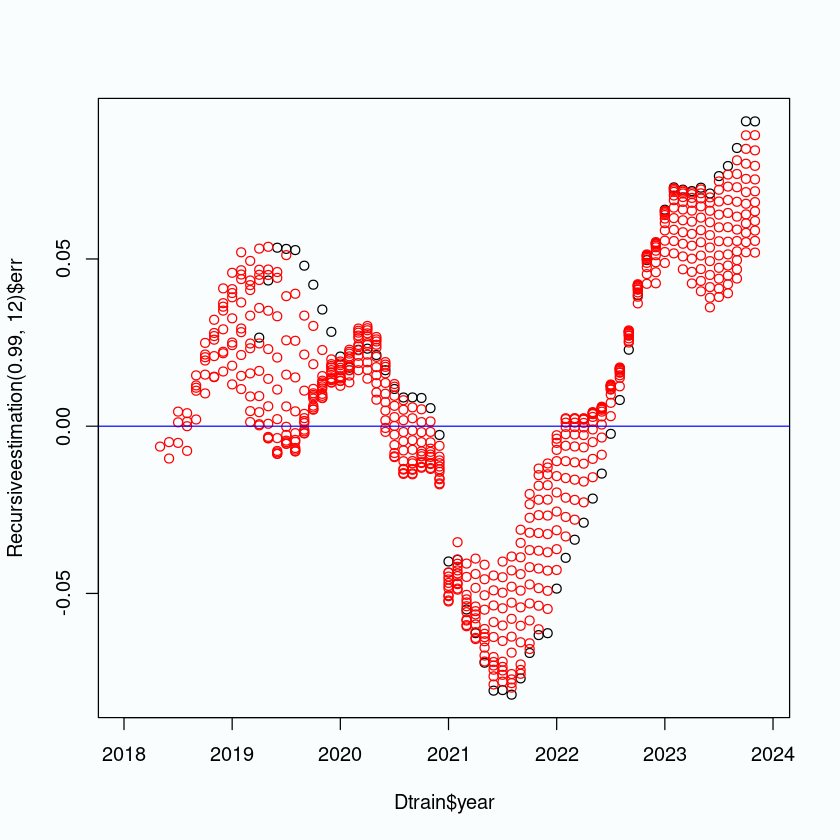

In [80]:
par(bg = "#fafdfd")

plot(Dtrain$year,Recursiveestimation(0.99,12)$err,col = "#000000")

for (k in 1:11) {
    points(Dtrain$year,Recursiveestimation(0.99,k)$err,col = "red")
}
abline(h = 0, col = "blue", lty = 1)

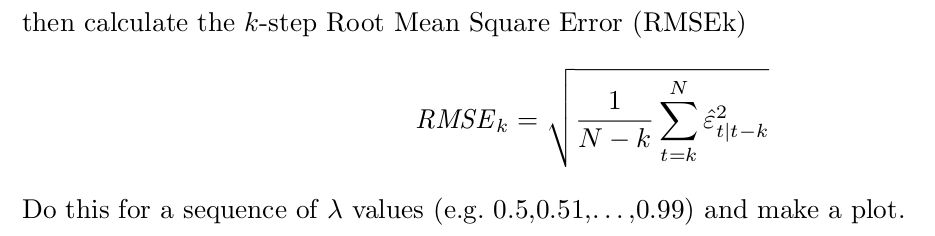

In [151]:
#then calculate the k-step Root Mean Square Error (RMSEk)

RMSE <- function(lambda, k) {
    sqrt(sum(Recursiveestimation(lambda,k)$err^2,na.rm = TRUE)/(N-k))
}



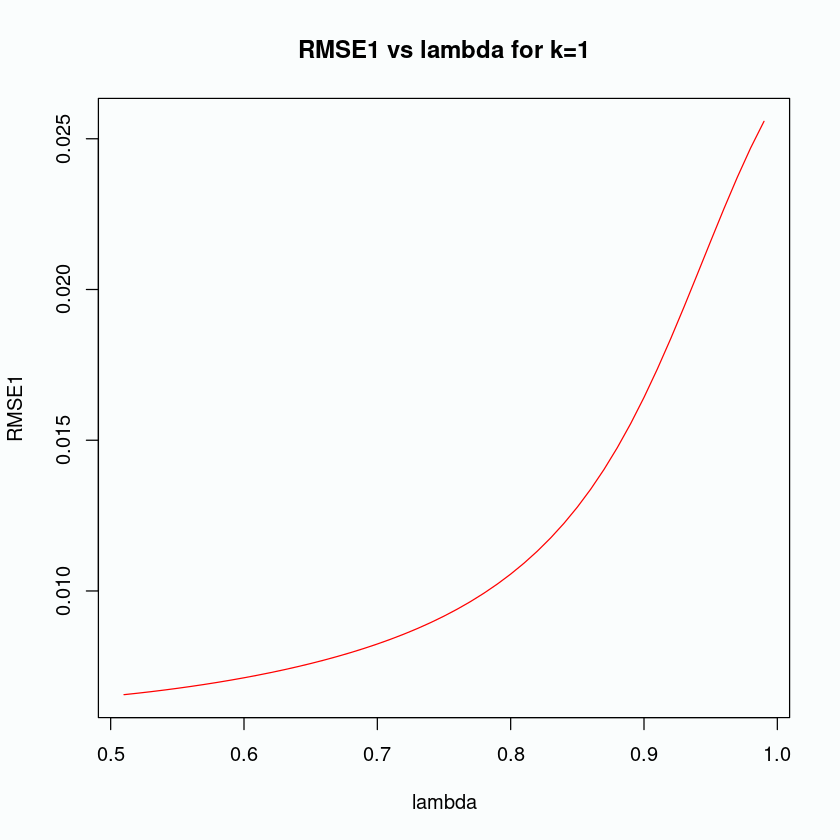

In [195]:
l = seq(0.51,0.99,0.01)
lambda_list <- matrix(NA, nrow=length(lambda), ncol=1)

for (i in 1:length(l)) {
    # print(RMSE(l[i],1))
    lambda_list[i] <- RMSE(l[i],1)
}

par(bg = "#fafdfd")
plot(l,lambda_list,"l",col = "red",xlab = "lambda",ylab = "RMSE1",main = "RMSE1 vs lambda for k=1")

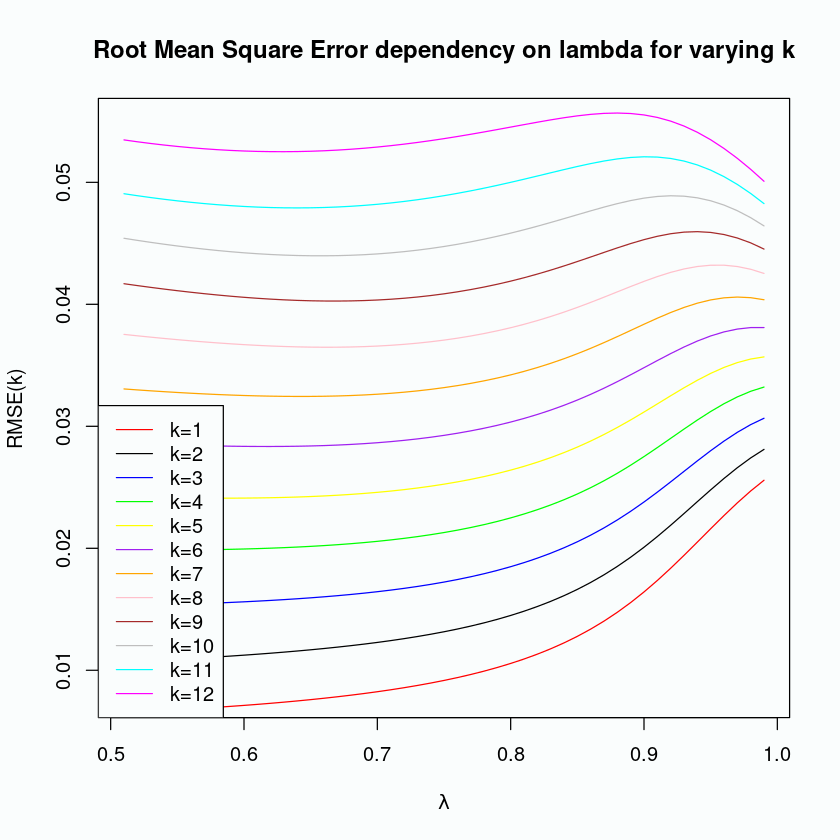

In [224]:
# #save as png    
# png(file="RMSE.png", width = 800, height = 800)
color_list <- c("red","black","blue","green","yellow","purple","orange","pink","brown","grey","cyan","magenta")
l = seq(0.51,0.99,0.01)
lambda_list <- matrix(NA, nrow=length(lambda), ncol=1)

for (i in 1:length(l)) {
    # print(RMSE(l[i],1))
    lambda_list[i] <- RMSE(l[i],1)
}

par(bg = "#fafdfd")
plot(l,lambda_list,"l",xlab = expression(lambda),ylab = "RMSE(k)",main = "Root Mean Square Error dependency on lambda for varying k",col = color_list[1], ylim = c(0.008,0.055))

for (k in 2:12){
    lambda_list <- matrix(NA, nrow=length(lambda), ncol=1)

    for (i in 1:length(l)) {
        # print(RMSE(l[i],1))
        lambda_list[i] <- RMSE(l[i],k)
    }

    par(bg = "#fafdfd")
    points(l,lambda_list,"l",col = color_list[k])

}
#legend beside plot with the color of the lines corresponding to the values of k
legend("bottomleft", legend = c("k=1","k=2","k=3","k=4","k=5","k=6","k=7","k=8","k=9","k=10","k=11","k=12"), lty=rep(1,12), col=color_list)

